# Joe Biden Stock Portfolio

## Invest in Energy Renewables

https://en.wikipedia.org/wiki/Joe_Biden

https://www.cnn.com/2022/02/22/politics/biden-new-investments-mineral-production-supply-chain/index.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY', 'BEPC','CWEN','FSLR','NEE', 'SEDG']
start = '2021-01-20'
end = '2022-03-25'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 completed


,BEPC,CWEN,FSLR,NEE,SEDG,SPY
Date,,,,,,
2021-01-20,56.757931,32.690845,101.750000,81.973747,297.179993,377.666870
2021-01-21,57.354874,33.401524,107.529999,81.642143,317.179993,378.011200
2021-01-22,56.488342,33.268864,106.669998,82.129791,321.119995,376.673248
2021-01-25,55.997307,33.212002,104.940002,84.724083,310.119995,378.158813
2021-01-26,54.013908,31.250557,104.690002,83.124603,296.679993,377.568512


In [3]:
df.tail()

,BEPC,CWEN,FSLR,NEE,SEDG,SPY
Date,,,,,,
2022-03-18,42.630001,36.389999,77.599998,82.370003,312.510010,444.519989
2022-03-21,42.310001,36.500000,77.389999,81.800003,312.079987,444.390015
2022-03-22,42.910000,36.779999,79.080002,82.849998,325.109985,449.589996
2022-03-23,42.680000,35.750000,77.989998,82.570000,327.269989,443.799988
2022-03-24,42.230000,36.070000,79.529999,83.699997,337.739990,450.489990


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

1 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
BEPC: 20000.0
CWEN: 20000.0
FSLR: 20000.0
NEE: 20000.0
SEDG: 20000.0


In [8]:
print('Number of Shares:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
BEPC: 352
CWEN: 611
FSLR: 196
NEE: 243
SEDG: 67


In [9]:
print('Beginning Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
BEPC: $19978.79
CWEN: $19974.11
FSLR: $19943.0
NEE: $19919.62
SEDG: $19911.06


In [10]:
print('Current Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
BEPC: $14864.96
CWEN: $22038.77
FSLR: $15587.88
NEE: $20339.1
SEDG: $22628.58


In [11]:
result = []
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $95459.29


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: BEPC: -25.6%
Holding Period Return: CWEN: 10.34%
Holding Period Return: FSLR: -21.84%
Holding Period Return: NEE: 2.11%
Holding Period Return: SEDG: 13.65%
Holding Period Return: SPY: 19.28%


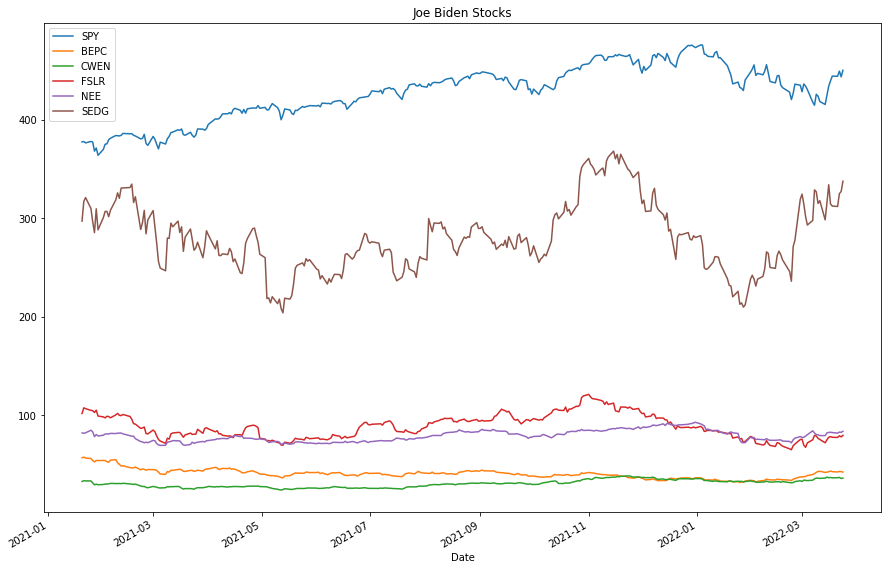

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Joe Biden Stocks')
plt.legend()

In [14]:
df.min()

BEPC     31.639975
CWEN     24.003393
FSLR     64.900002
NEE      69.315323
SEDG    204.009995
SPY     364.070953
dtype: float64

In [15]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 476.23052978515625
BEPC: 57.35487365722656
CWEN: 38.42129898071289
FSLR: 121.13999938964844
NEE: 92.84577178955078
SEDG: 368.3299865722656


In [16]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,BEPC Return,CWEN Return,FSLR Return,NEE Return,SEDG Return
Date,,,,,,
2021-01-21,0.000912,0.010517,0.021739,0.056806,-0.004045,0.067299
2021-01-22,-0.003539,-0.015108,-0.003972,-0.007998,0.005973,0.012422
2021-01-25,0.003944,-0.008693,-0.001709,-0.016218,0.031588,-0.034255
2021-01-26,-0.001561,-0.035420,-0.059058,-0.002382,-0.018879,-0.043338


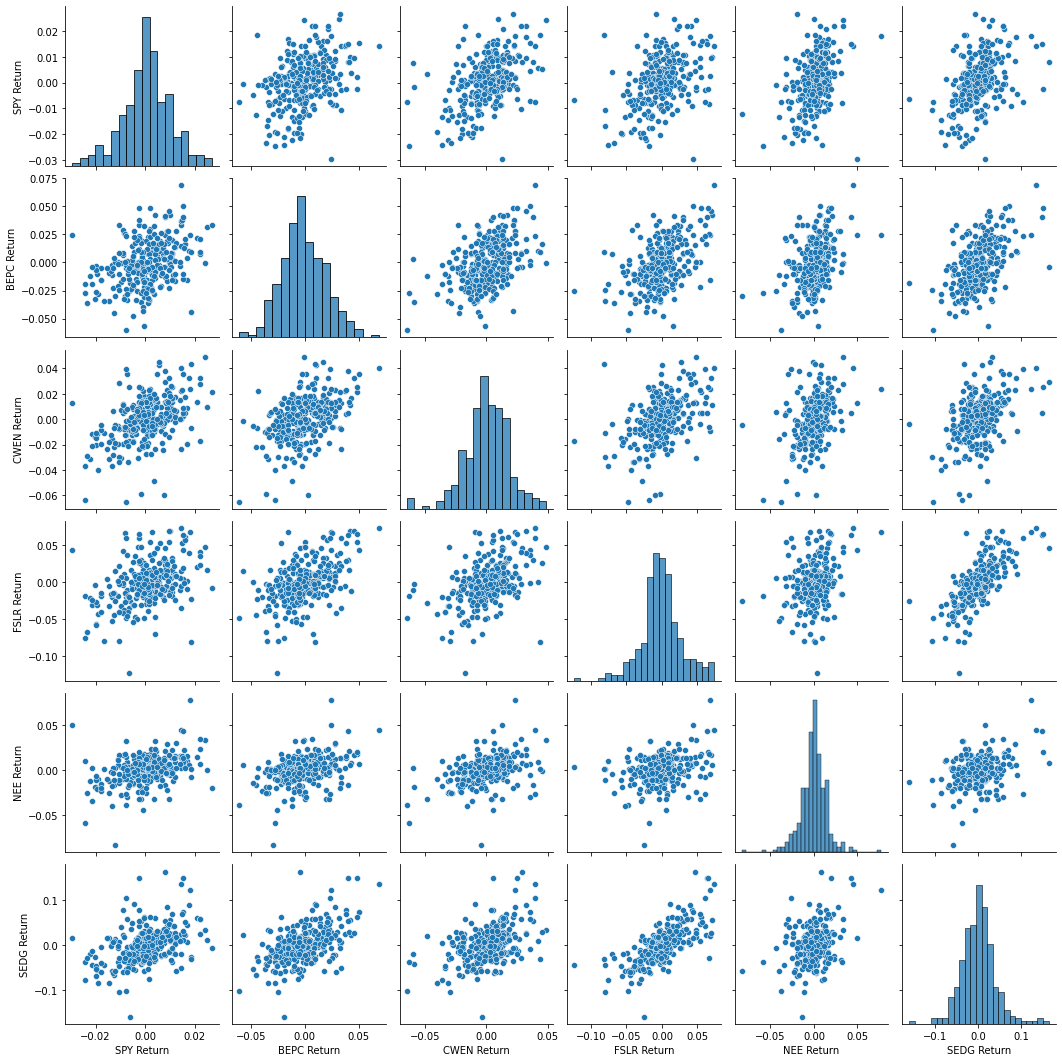

In [17]:
sns.pairplot(returns[1:] )

In [18]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return    2022-03-09
BEPC Return   2021-03-09
CWEN Return   2021-03-01
FSLR Return   2021-03-09
NEE Return    2022-01-31
SEDG Return   2021-08-03
dtype: datetime64[ns]


In [19]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return    2022-03-07
BEPC Return   2021-02-22
CWEN Return   2021-02-22
FSLR Return   2021-04-30
NEE Return    2022-01-25
SEDG Return   2021-05-04
dtype: datetime64[ns]


In [20]:
returns.corr()

,SPY Return,BEPC Return,CWEN Return,FSLR Return,NEE Return,SEDG Return
SPY Return,1.000000,0.360408,0.460826,0.399416,0.388179,0.432935
BEPC Return,0.360408,1.000000,0.457949,0.487891,0.387439,0.515429
CWEN Return,0.460826,0.457949,1.000000,0.444944,0.401448,0.462395
FSLR Return,0.399416,0.487891,0.444944,1.000000,0.283551,0.716066
NEE Return,0.388179,0.387439,0.401448,0.283551,1.000000,0.318005
SEDG Return,0.432935,0.515429,0.462395,0.716066,0.318005,1.000000


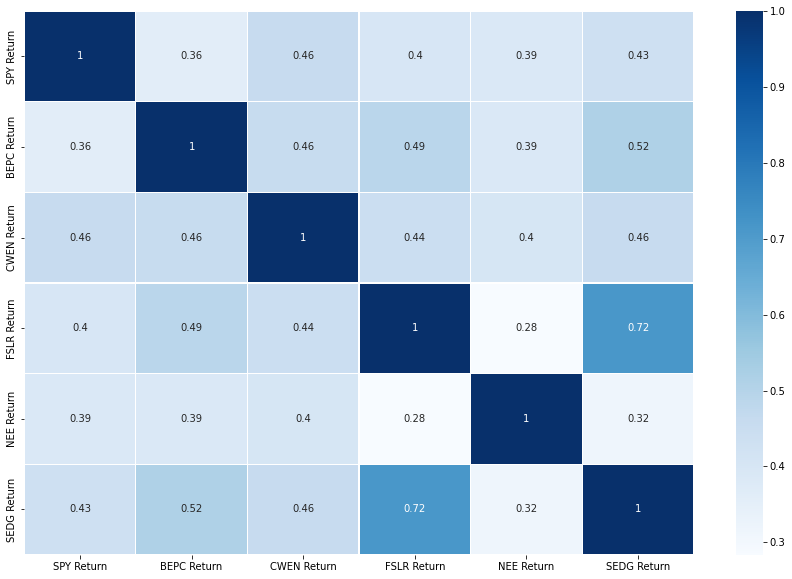

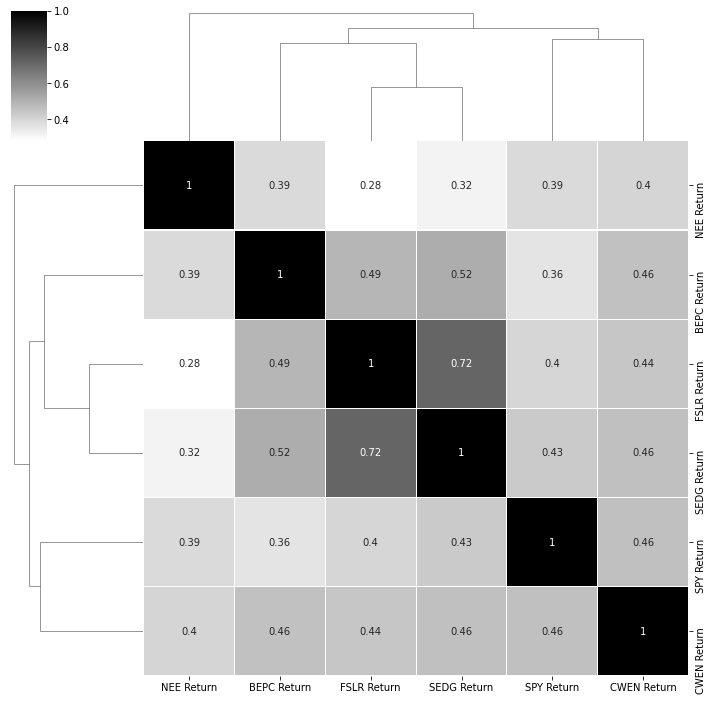

In [21]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

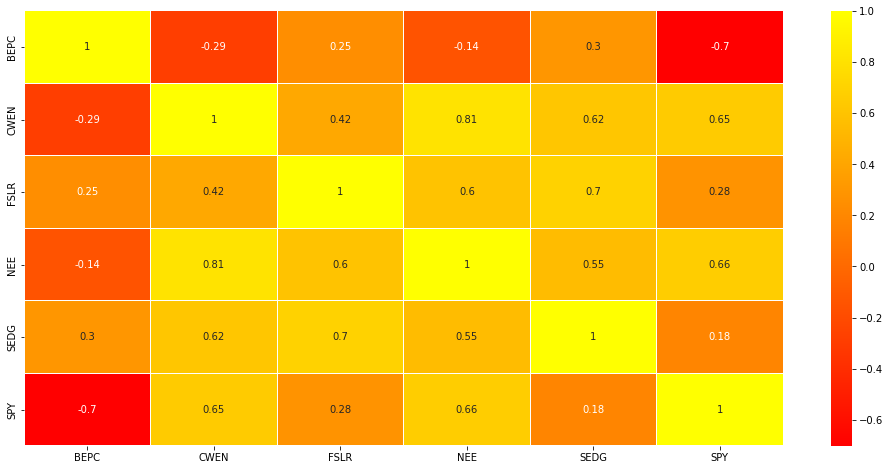

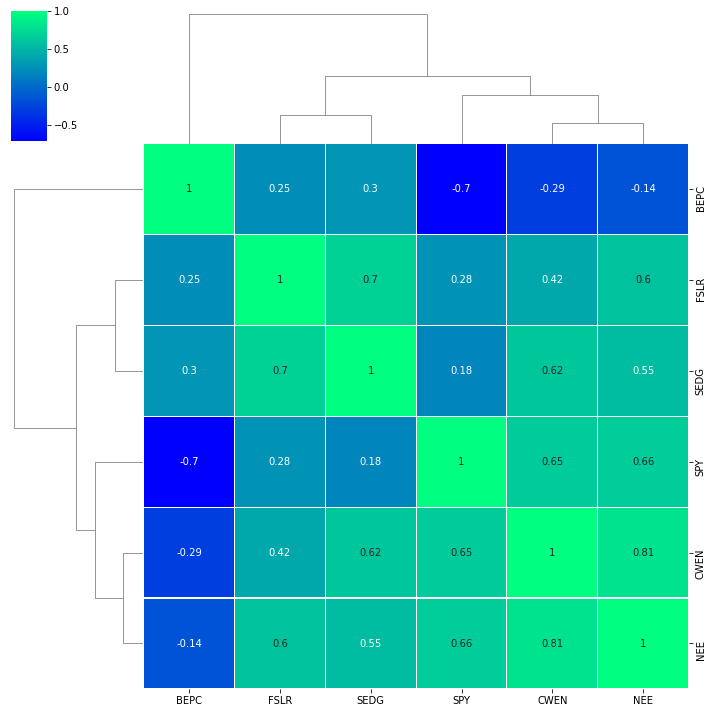

In [22]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [23]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [24]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [25]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  -------------------------------------------------------------------------
90%                 [-0.02678108 -0.0222206  -0.03692179 -0.01976195 -0.04993031 -0.01153275]
95%                 [-0.03414931 -0.02865847 -0.04726902 -0.02541858 -0.06443051 -0.01498327]
99%                 [-0.04797089 -0.04073486 -0.06667869 -0.03602947 -0.09163046 -0.02145588]


In [26]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
BEPC: -0.0268
CWEN: -0.0222
FSLR: -0.0369
NEE: -0.0198
SEDG: -0.0499
SPY: -0.0115


In [27]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
BEPC: $2680.0
CWEN: $2220.0
FSLR: $3690.0
NEE: $1980.0000000000002
SEDG: $4990.0
SPY: $1150.0


In [28]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
BEPC: $4800.0
CWEN: $4070.0
FSLR: $6669.999999999999
NEE: $3599.9999999999995
SEDG: $9160.0
SPY: $2150.0
